<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/Semana7/A01793538_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACTIVIDAD SEMANA 7 Regresiones y K means**

**MATERIA : CIENCIA DE DATOS**

**ALUMNO : DANIEL HERNANDEZ MORA**

**MATRICULA : A01793538**

**TUTOR : BERNARDO CHARLES CANALES**

**PROFESORA TITULAR : MARIA DE LA PAZ RICO FERNANDEZ**

**09 de Noviembre de 2022**

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [577]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [578]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [579]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

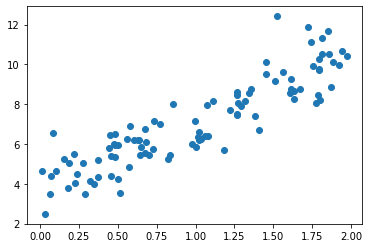

In [580]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [581]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [582]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [583]:
#X_fit[]

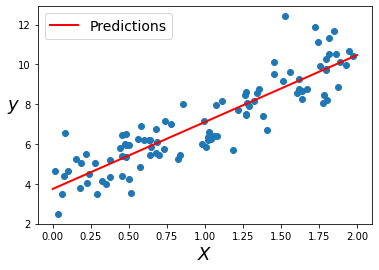

In [584]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [585]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [586]:
X_new.shape

(2, 1)

In [587]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [588]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [589]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [590]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

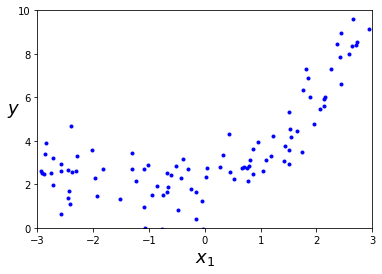

In [591]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [592]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [593]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [594]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [595]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [596]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [597]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

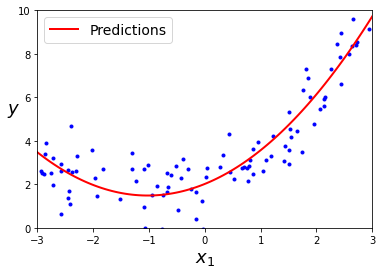

In [598]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

**Ejercicio 1.** 

Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

Regresión Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Regresión Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [599]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [600]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [601]:
len(X)

1000

In [602]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

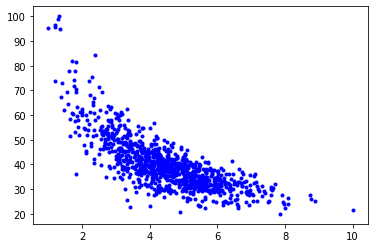

In [603]:
plt.plot(X,y,'b.')

In [604]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


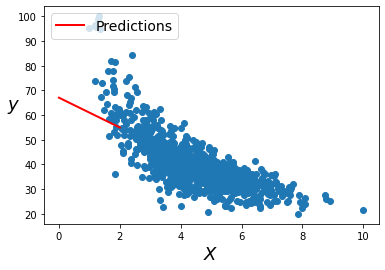

In [605]:
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [606]:
r_sq = linear_reg.score(X, y)
r_sq

0.5789767558506287

In [607]:
y_pred = linear_reg.predict(X)

In [608]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.921245677483368
Root Mean Squared Error: 6.871474273023592
r2_score 0.5789767558506287


In [609]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [610]:
print(X)
print(X_poly)

     Number of Units
0           1.000000
1           1.185994
2           1.191499
3           1.204771
4           1.298773
..               ...
995         8.099710
996         8.739752
997         8.780888
998         8.897700
999        10.000000

[1000 rows x 1 columns]
[[  1.           1.        ]
 [  1.18599365   1.40658094]
 [  1.19149864   1.41966901]
 ...
 [  8.78088812  77.10399623]
 [  8.89769971  79.16906006]
 [ 10.         100.        ]]


In [611]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([-16.82425278,   1.17336718]), 89.73719677939121)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


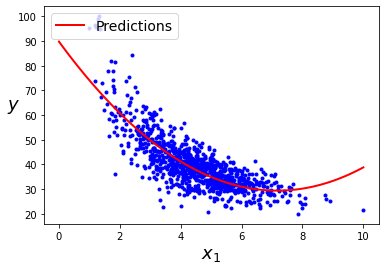

In [612]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [613]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.921245677483368
Root Mean Squared Error: 6.871474273023592
r2_score 0.5789767558506287


In [614]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Mumero total de registros en el test dataset: 200
Tamaño del X_test: (200, 1)


**LINEAL**

In [615]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
lre=LinearRegression()

In [616]:
lre.fit(X_train, y_train)

LinearRegression()

In [617]:
y_hat = lre.predict(X_test)
y_hat

array([40.06584788, 33.08549058, 41.13153942, 42.54070036, 45.55305442,
       28.17722463, 44.95308512, 33.34778009, 43.63367493, 53.3716243 ,
       41.24227386, 48.50272407, 24.34834242, 43.03757974, 24.09840979,
       48.6870478 , 49.98583914, 58.91094952, 38.05581175, 40.24114336,
       35.77127774, 40.85356061, 38.07664004, 40.18310633, 41.44619313,
       49.41762982, 49.72084098, 36.88968201, 38.4192565 , 42.38574128,
       29.40299945, 35.49480185, 34.93808808, 40.25878691, 41.92339785,
       44.70717141, 51.16741234, 35.44926558, 36.91818593, 37.61160497,
       31.22306527, 36.18692982, 50.60718337, 50.18924984, 50.33901479,
       38.6555148 , 39.53370372, 54.20783038, 41.08605263, 18.10698188,
       35.58625385, 54.97248896, 36.99768476, 54.89461853, 48.3394065 ,
       41.07899673, 30.67687047, 36.40041457, 40.44376247, 36.26257421,
       43.92176455, 45.69691281, 42.12057625, 35.174455  , 33.03371026,
       33.30450531, 40.9559649 , 33.24528407, 39.62991559, 56.49

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


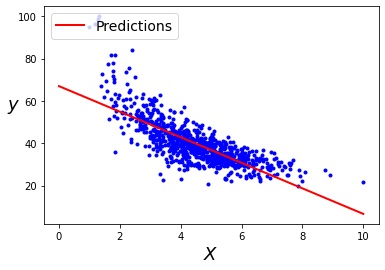

In [618]:
X_fit = np.linspace(0, 10, 200)
y_fit = lre.predict(X_fit[:, np.newaxis])

plt.plot(X_train, y_train, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [619]:
train_score = lre.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lre.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 58.725839511929365
Test score of trained model: 53.724818575543566


In [620]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


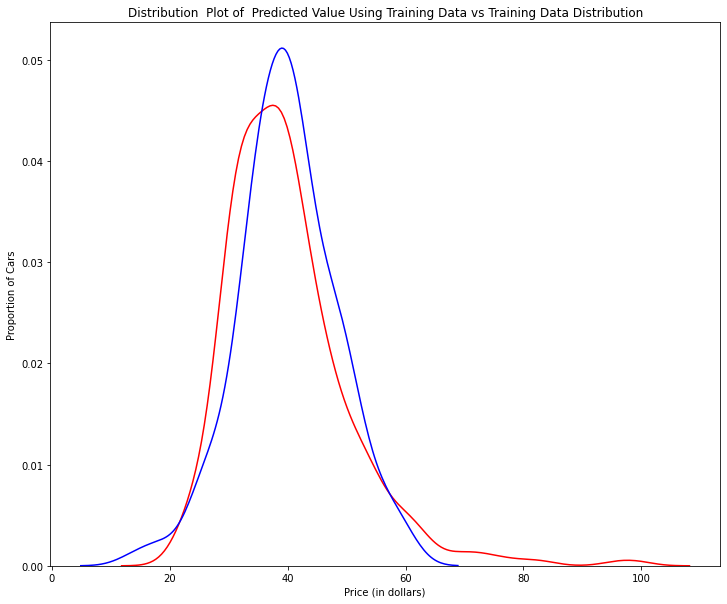

In [621]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_hat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [622]:
print('Linear Model Coefficient (m): ', lre.coef_)
print('Linear Model Coefficient (b): ', lre.intercept_)

Linear Model Coefficient (m):  [-6.0358007]
Linear Model Coefficient (b):  66.99521465134505


In [623]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, y_hat)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
MAE = mean_absolute_error(y_test, y_hat)
MAPE = np.mean(np.abs( (y_test-y_hat) / y_test))*100
r2 = r2_score(y_test, y_hat)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,57.798940
1,RMSE,7.602561
2,MAE,5.395746
3,MAPE,13.684004
4,r2,0.537248
5,adj_r2,0.534121


**POLINOMIAL**

In [624]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-5.27804963e+01,  1.17634986e+01, -1.24039227e+00,  4.87822706e-02]),
 130.16255659907534)

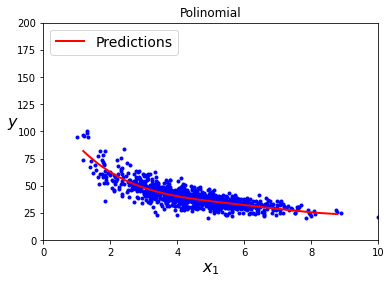

In [625]:
X_poly = poly_features.fit_transform(X_test)
y_predict = lin_reg.predict(X_poly)

ordered = np.argsort(X_test.values.ravel())

x_sorted_poly = X_test.values.ravel()[ordered]
y_sorted_poly = y_test.values.ravel()[ordered]
sorted_predicPoly = y_predict[ordered]


plt.plot(X, y, "b.")
plt.plot(x_sorted_poly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.title("Polinomial")
plt.axis([0, 10, 0, 200]);

In [626]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [643]:
print('POLY Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_sorted_poly, sorted_predicPoly))
print('POLY Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_sorted_poly, sorted_predicPoly)))
print('POLY r2_score: ',r2_score(y_sorted_poly, sorted_predicPoly))

POLY Error medio Absoluto (MAE): 4.888442246173782
POLY Root Mean Squared Error: 6.23521188912988
POLY r2_score:  0.6887347133143189


RIDGE Y LASSO

In [628]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [629]:
modelo_Ridge = Ridge(alpha= 1)
modelo_Ridge.fit(X_train, y_train)
modelo_Ridge.coef_, lin_reg.intercept_

(array([-6.03179445]), 130.16255659907534)

(0.0, 10.0, 0.0, 200.0)

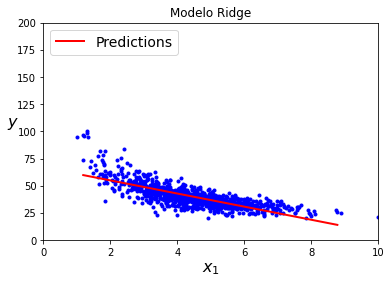

In [630]:
y_predict = modelo_Ridge.predict(X_test)

ordered = np.argsort(X_test.values.ravel())

X_Ridge = X_test.values.ravel()[ordered]
Y_Ridge = y_test.values.ravel()[ordered]
sorted_predictRidge = y_predict[ordered]


plt.plot(X, y, "b.")
plt.plot(X_Ridge, sorted_predictRidge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.title("Modelo Ridge")
plt.axis([0, 10, 0, 200])

In [641]:
print('RIDGE Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_Ridge, sorted_predictRidge))
print('RIDGE Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Ridge, sorted_predictRidge)))
print('RIDGE r2_score: ',r2_score(Y_Ridge, sorted_predictRidge))

RIDGE Error medio Absoluto (MAE): 5.395244247776685
RIDGE Root Mean Squared Error: 7.60254788229423
RIDGE r2_score:  0.5372498325885511


In [632]:
modelo_Lasso = Lasso(alpha = 1)
modelo_Lasso.fit(X_train, y_train)
modelo_Lasso.coef_, lin_reg.intercept_

(array([-5.47124119]), 130.16255659907534)

In [633]:

y_predict = modelo_Lasso.predict(X_test)

ordered = np.argsort(X_test.values.ravel())

X_Lasso = X_test.values.ravel()[ordered]
Y_Lasso = y_test.values.ravel()[ordered]
sorted_predictLasso = y_predict[ordered]

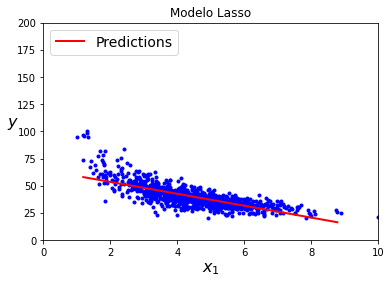

In [634]:
plt.plot(X, y, "b.")
plt.plot(X_Lasso, sorted_predictLasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.title("Modelo Lasso")
plt.axis([0, 10, 0, 200]);

In [642]:
print('LASSO Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_Lasso, sorted_predictLasso))
print('LASSO Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Lasso, sorted_predictLasso)))
print('LASSO r2_score: ',r2_score(Y_Lasso, sorted_predictLasso))

LASSO Error medio Absoluto (MAE): 5.331358585075365
LASSO Root Mean Squared Error: 7.639162491333463
LASSO r2_score:  0.5327817996881952


Text(0.5, 1.0, 'Comparación modelos con MAE')

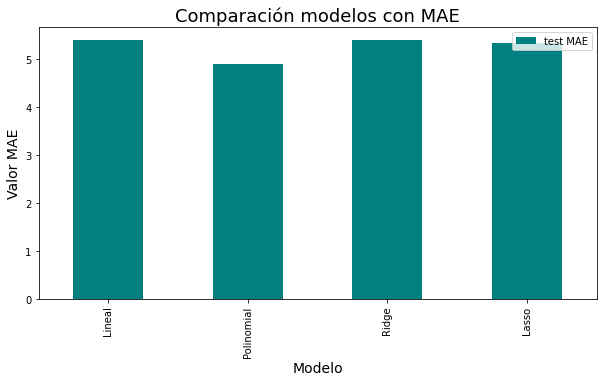

In [638]:
MAE_lineal = metrics.mean_absolute_error(y_test, y_hat)
MAE_Polinomial = metrics.mean_absolute_error(y_sorted_poly, sorted_predicPoly)
MAE_Ridge = metrics.mean_absolute_error(Y_Ridge, sorted_predictRidge)
MAE_Lasso = metrics.mean_absolute_error(Y_Lasso, sorted_predictLasso)

comparison_MAE = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [MAE_lineal, MAE_Polinomial, MAE_Ridge, MAE_Lasso]
                 })

fig, ax = plt.subplots(figsize=(10, 5))
comparison_MAE.set_index('modelo').plot(kind='bar', ax=ax, color = 'teal')
ax.set_xlabel('Modelo', fontsize = 14)
ax.set_ylabel('Valor MAE', fontsize = 14)
ax.set_title('Comparación modelos con MAE', fontsize = 18)

Text(0.5, 1.0, 'Comparación modelos con R2')

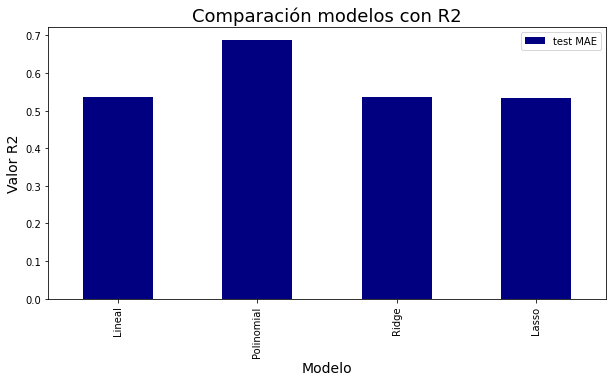

In [639]:
R2_lineal = metrics.r2_score(y_test, y_hat)
R2_Polinomial = metrics.r2_score(y_sorted_poly, sorted_predicPoly)
R2_Ridge = metrics.r2_score(Y_Ridge, sorted_predictRidge)
R2_Lasso = metrics.r2_score(Y_Lasso, sorted_predictLasso)

comparison_R2 = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [R2_lineal, R2_Polinomial, R2_Ridge, R2_Lasso]
                 })

fig, ax = plt.subplots(figsize=(10, 5))
comparison_R2.set_index('modelo').plot(kind='bar', ax=ax, color = 'navy')
ax.set_xlabel('Modelo', fontsize = 14)
ax.set_ylabel('Valor R2', fontsize = 14)
ax.set_title('Comparación modelos con R2', fontsize = 18)

Este caso fue considerado con 85% de datos de entrenamiento y y 15% para datos de prueba. Lo anterior debido a que considero tenemos buen volumen de datos que nos permite al momento de probar el modelo tener los datos suficientes para corroborar el comportamiento del modelo.

Segun los resultados el modelo que mas puede convenir es el polinomial dado que tuvo mejor desempeño en el valor de MAE, ( 4.88) con respecto al resto de los modelos, aunque si este fuera el unico criterio, los 4 modelos podrian ser usados, La razon poderosa de elegir el modelo Polinomial van e un función de R cuadrada, ya que los restantes 3 modelos ( lineal Lasso y Ridge) los valores de R2 estan por debajo del 0.6, dado que para el modelo polinomail esta alrededor de 0.7, y observando la grafica de comportamiento de la predicción y los datos, podemos concluir que se ajusta bastante bien al coportamiento de los datos de entrenamiento y prueba, y en adicion los valores residuales no son mayusculos.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

Ejercicio 2. Regresión múltiple.

Encuentra el mejor regresor para los datos de las casas:

Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
Regresión Múltiple Lineal.

Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

Regresión Múltiple Polinomial.

Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

Finalmente gráfica :

MAE (de los cuatro métodos)

R2 (de los cuatro métodos)


Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
Agrega las conclusiones

In [554]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [556]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [557]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


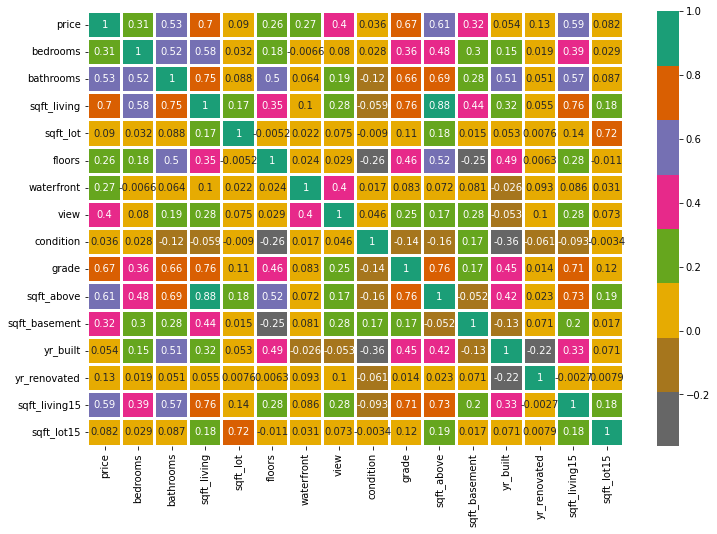

In [558]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [559]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [560]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [561]:
#tu codigo aquí

LINEAL

In [562]:
L_reg = LinearRegression(fit_intercept=True)
L_reg.fit(X_train, y_train)

Y_pred = L_reg.predict(X_test)
L_reg.coef_, lin_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 130.16255659907534)

In [563]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('r2_score: ',r2_score(y_test, Y_pred))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score:  0.6579723205007814


In [564]:
MAE_lineal = metrics.mean_absolute_error(y_test, Y_pred)
R2_lineal = metrics.r2_score(y_test, Y_pred)
print(MAE_lineal, R2_lineal)

137480.1388273178 0.6579723205007814


POLINOMIAL

In [565]:

Poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train2 = Poly_feat.fit_transform(X_train)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train2, y_train)
lin_reg.coef_, lin_reg.intercept_

X_poly_test = Poly_feat.fit_transform(X_test)
y_pred = lin_reg.predict(X_poly_test)

lin_reg.coef_, lin_reg.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

In [566]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score:  0.7797929072570198


In [567]:
MAE_poly = metrics.mean_absolute_error(y_test, y_pred)
R2_poly = metrics.r2_score(y_test, y_pred)
print(MAE_poly, R2_poly)

121314.06948173394 0.7797929072570198


In [568]:
Model_ridge = Ridge(alpha = 1)
Model_ridge.fit(X_train, y_train)
Model_ridge.coef_, lin_reg.intercept_
y_pred2 = Model_ridge.predict(X_test)

Model_ridge.coef_, lin_reg.intercept_

(array([[-3.82192265e+04,  4.14509656e+04,  1.08013951e+02,
          1.69318239e-02,  3.16891574e+04,  5.48258333e+05,
          4.14559235e+04,  2.12264347e+04,  1.19470568e+05,
          4.78066878e+01,  6.02065605e+01, -3.55050129e+03,
          1.33171890e+01,  2.89851987e+01, -5.47998512e-01]]),
 array([80227028.3104757]))

In [569]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score:  0.7797929072570198


In [570]:
MAE_Ridge_eje2 = metrics.mean_absolute_error(y_test, y_pred)
R2_Ridge_eje2 = metrics.r2_score(y_test, y_pred)
print(MAE_Ridge_eje2, R2_Ridge_eje2)

121314.06948173394 0.7797929072570198


In [571]:
Mod_lasso = Lasso(alpha= 0.01)
Mod_lasso.fit(X_train, np.ravel(y_train))

y_pred = Mod_lasso.predict(X_test)

Mod_lasso.coef_, lin_reg.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-3.82007921e+04,  4.14660952e+04,  2.93482224e+02,  1.71356245e-02,
         3.16916458e+04,  5.52689524e+05,  4.12493792e+04,  2.12221167e+04,
         1.19493202e+05, -1.37714566e+02, -1.25272065e+02, -3.55090164e+03,
         1.32602477e+01,  2.90059224e+01, -5.48132637e-01]),
 array([80227028.3104757]))

In [572]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.14315454173
Root Mean Squared Error: 232133.37922044084
r2_score:  0.6579722863283719


In [573]:
MAE_lasso_eje2 = metrics.mean_absolute_error(y_test, y_pred)
R2_lasso_eje2 = metrics.r2_score(y_test, y_pred)
print(MAE_lasso_eje2, R2_lasso_eje2)

137480.14315454173 0.6579722863283719


Text(0.5, 1.0, 'Comparación de los modelos con MAE')

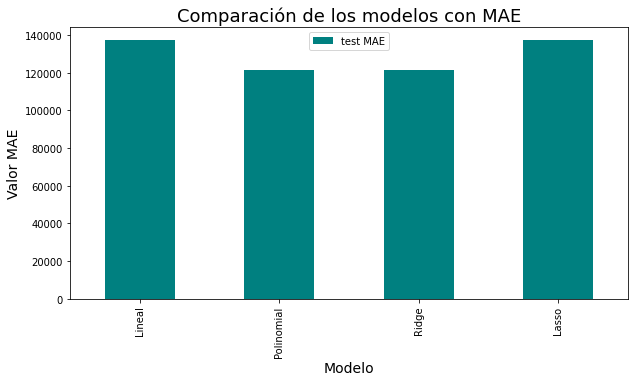

In [574]:
comparison_MAE_2 = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [MAE_lineal, MAE_poly, MAE_Ridge_eje2, MAE_lasso_eje2]
                 })

fig, ax = plt.subplots(figsize=(10, 5))
comparison_MAE_2.set_index('modelo').plot(kind='bar', ax=ax, color = "teal")
ax.set_xlabel('Modelo', fontsize = 14)
ax.set_ylabel('Valor MAE', fontsize = 14)
ax.set_title('Comparación de los modelos con MAE', fontsize = 18)

Text(0.5, 1.0, 'Comparación de los modelos con R2')

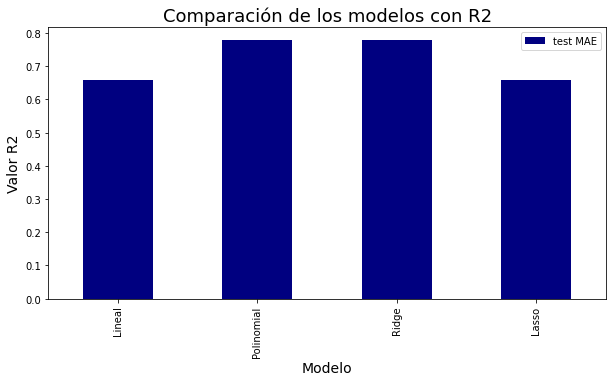

In [575]:

df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [R2_lineal, R2_poly, R2_Ridge_eje2, R2_lasso_eje2]
                 })

fig, ax = plt.subplots(figsize=(10, 5))
df_comparacion.set_index('modelo').plot(kind='bar', ax=ax, color = 'Navy')
ax.set_xlabel('Modelo', fontsize = 14)
ax.set_ylabel('Valor R2', fontsize = 14)
ax.set_title('Comparación de los modelos con R2', fontsize = 18)

Conclusiones:

Para este ejercicio considero que al tenemos mayor cantidad de variables, a excepción del modelo lineal, tenemos un buen comportamiento de los modelos Polinomiales y Ridge.  En todos los modelos los valores de r cuadrada cumplirian con un valor mayo de 0.6 pero es el valor de MAE quien nos indica que los modelos que mejor se ajustan son MAE y Ridge

En este caso, solamente use un 10% como datos de prueba y deje un 90% como datos de entrenamiento.